In [28]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
from statsmodels.regression.linear_model import OLS

# Make data.
mu1, mu2 = 0,0
s11, s12, s22 = 1, 0.5, 1
Z = multivariate_normal(mean=[mu1,mu2], cov=np.array([[s11, s12], [s12, s22]]))

In [29]:
biv_normal_samples = Z.rvs(1000)

In [30]:
x1_samples = biv_normal_samples[:,0]
x2_samples = biv_normal_samples[:,1]

#### First, we'll regress x2 on x1

In [31]:
reg_mod = OLS(x2_samples, x1_samples).fit()

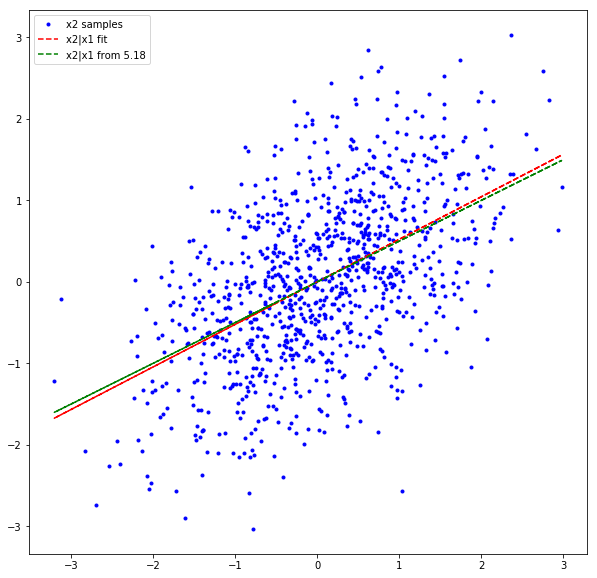

In [35]:
x2_given_x1 = reg_mod.predict()
x2_given_x1_518 = mu2 + s12/s11 * (x1_samples - mu1) 
plt.figure(figsize=(10,10))
plt.plot(x1_samples, x2_samples, '.b')
plt.plot(x1_samples, x2_given_x1, '--r')
plt.plot(x1_samples, x2_given_x1_518, '--g')
plt.legend(['x2 samples', 'x2|x1 fit', 'x2|x1 from 5.18'])

In [46]:
# Variance from regression residuals vs. variance from 5.18
(reg_mod.resid.var().round(3) , s22 - ((s12 ** 2) / s11))

(0.755, 0.75)

#### The regression fit and the conditional mean obtained using 5.18 are quite similar, as expected.
#### Variance of conditional x2 estimate and variance of residuals also very similar, as expected.

#### Now we'll regress x1 on x2...

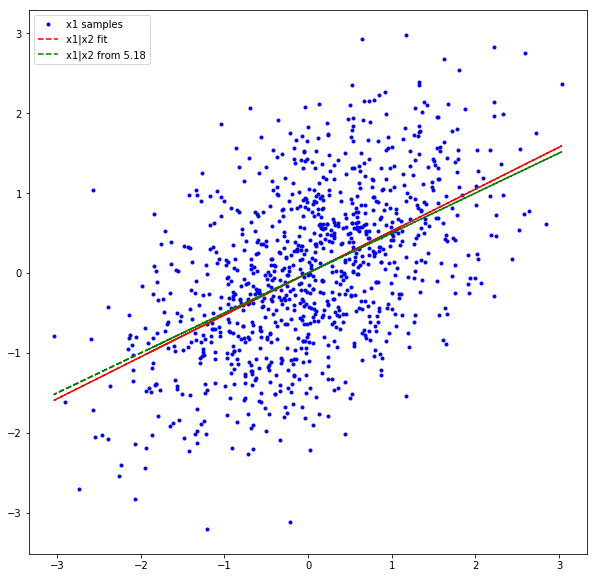

In [47]:
reg_mod = OLS(x1_samples, x2_samples).fit()
x1_given_x2 = reg_mod.predict()
x1_given_x2_518 = mu1 + s12/s22 * (x2_samples - mu2) 
plt.figure(figsize=(10,10))
plt.plot(x2_samples, x1_samples, '.b')
plt.plot(x2_samples, x1_given_x2, '--r')
plt.plot(x2_samples, x1_given_x2_518, '--g')
plt.legend(['x1 samples', 'x1|x2 fit', 'x1|x2 from 5.18'])

In [48]:
# Variance from regression residuals vs. variance from 5.18
(reg_mod.resid.var().round(3) , s11 - ((s12 ** 2) / s22))

(0.758, 0.75)

#### The regression fit and the conditional mean obtained using 5.18 are quite similar, as expected.
#### Variance of conditional x1 estimate and variance of residuals also very similar, as expected.